<img src="../fasp/runner/credits/images/FASPNotebook08.jpg" style="float: right;">


### Validate same compute on AWS and GCP

* Query: CRDC - ISB-CGC GDC BigQuery Tables - via Data Connect Service
* Locate: CRDC DRS Service
* Compute: CRDC - Seven Bridges CGC and ISB-CGC (Google Cloud)




Runs the compute on two different platforms to check the same results are obtained on both platforms.
This prepares for running a job such as FASP scripts.
This script runs the same work as FASPScript8 and uses FASPRunner twice.

In [1]:
from fasp.runner import FASPRunner

# The implementations we're using
from fasp.loc import crdcDRSClient
from fasp.workflow import sbcgcWESClient, GCPLSsamtools
from fasp.search import DataConnectClient

faspRunner = FASPRunner('FASPNotebook08')
settings = faspRunner.settings

sbProject = settings['SevenBridgesProject']

# Step 1 - Discovery
# query for relevant DRS objects
searchClient = DataConnectClient('https://data.publisher.dnastack.com/data-connect/')

# Step 3 - set up the classes that runs samtools on the two clouds
location = 'projects/{}/locations/{}'.format(settings['GCPProject'], settings['GCPPipelineRegion'])
sam2 = GCPLSsamtools(location, settings['GCPOutputBucket'])
mysams = {'s3':sbcgcWESClient(settings['SevenBridgesProject']),
          'gs': sam2}

query = '''
    SELECT 'case_'||associated_entities__case_gdc_id , file_id
    FROM collections.public_datasets.cshcodeathon_gdc_rel24_filedata_active 
    WHERE data_format = 'BAM' 
        AND project_disease_type = 'Breast Invasive Carcinoma'
    LIMIT 3
'''


for sam, samClient in mysams.items():
    drsClient = crdcDRSClient('~/.keys/crdc_credentials.json', sam)
    samClient = mysams[sam]
    faspRunner.configure(searchClient, drsClient, samClient)
    faspRunner.runQuery(query, 'cross cloud SAMTools validation')

Running FASPNotebook08-Validation.ipynb
Running query

    SELECT 'case_'||associated_entities__case_gdc_id , file_id
    FROM collections.public_datasets.cshcodeathon_gdc_rel24_filedata_active 
    where data_format = 'BAM' 
    and project_disease_type = 'Breast Invasive Carcinoma'
    limit 3
_Retrieving the query_
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
subject=case_1b703058-e596-45bc-80fe-8b98d545c2e2, drsID=030e5e74-6461-4f05-a399-de8e470bc056
https://cgc-ga4gh-api.sbgenomics.com/ga4gh/wes/v1
workflow submitted, run:23671e18-9672-48cc-bf1b-95bda8468eda
____________________________________________________________
subject=case_a947a945-4721-45cc-bc45-13b8ea41c10e, drsID=04c68898-ddac-4e15-9f9a-5bf278d55e4a
https://cgc-ga4gh-api.sbgenomics.com/ga4gh/wes/v1
workflow submitted, run:5a933a8b-0921-4216-beb8-d85a38a32edd
____________________________________________________________
subject=case_c462e422-e

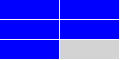

In [2]:
faspRunner.getFASPicon()

In [3]:
faspRunner.rollCredits()

DataConnectClient    DataConnectClient    
crdcDRSClient            crdcDRSClient            
sbcgcWESClient           GCPLSsamtools            
